### Decision Tree

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
Decision trees help you to evaluate your options. Decision Trees are excellent tools for helping you to choose between several courses of action. They provide a highly effective structure within which you can lay out options and investigate the possible outcomes of choosing those options.

## Decision Tree on Iris Dataset 

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). The dataset is often used in data mining, classification and clustering examples and to test algorithms.

###### Performed By : Muatif Shaikh 

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the iris dataset
df = pd.read_csv('Iris.csv', header = 0, index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


##### Checking the statistical details of the data

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Checking the data for missing values

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### Data Preprocessing

In [7]:
# Creating a X and Y variabes for independent and dependent variables
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [8]:
X.shape

(150, 4)

In [9]:
Y.shape

(150,)

In [10]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

##### Model Building

In [11]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [12]:
from sklearn.tree import DecisionTreeClassifier

# create the model
model_DecisionTree = DecisionTreeClassifier(random_state = 123)

# fit the model on the data
model_DecisionTree.fit(X_train, Y_train)

# predicting on the data
Y_pred = model_DecisionTree.predict(X_test)

##### Visualizing the tree for better understanding

In [13]:
# Installing the required libraries
!pip install pydotplus
!pip install graphviz

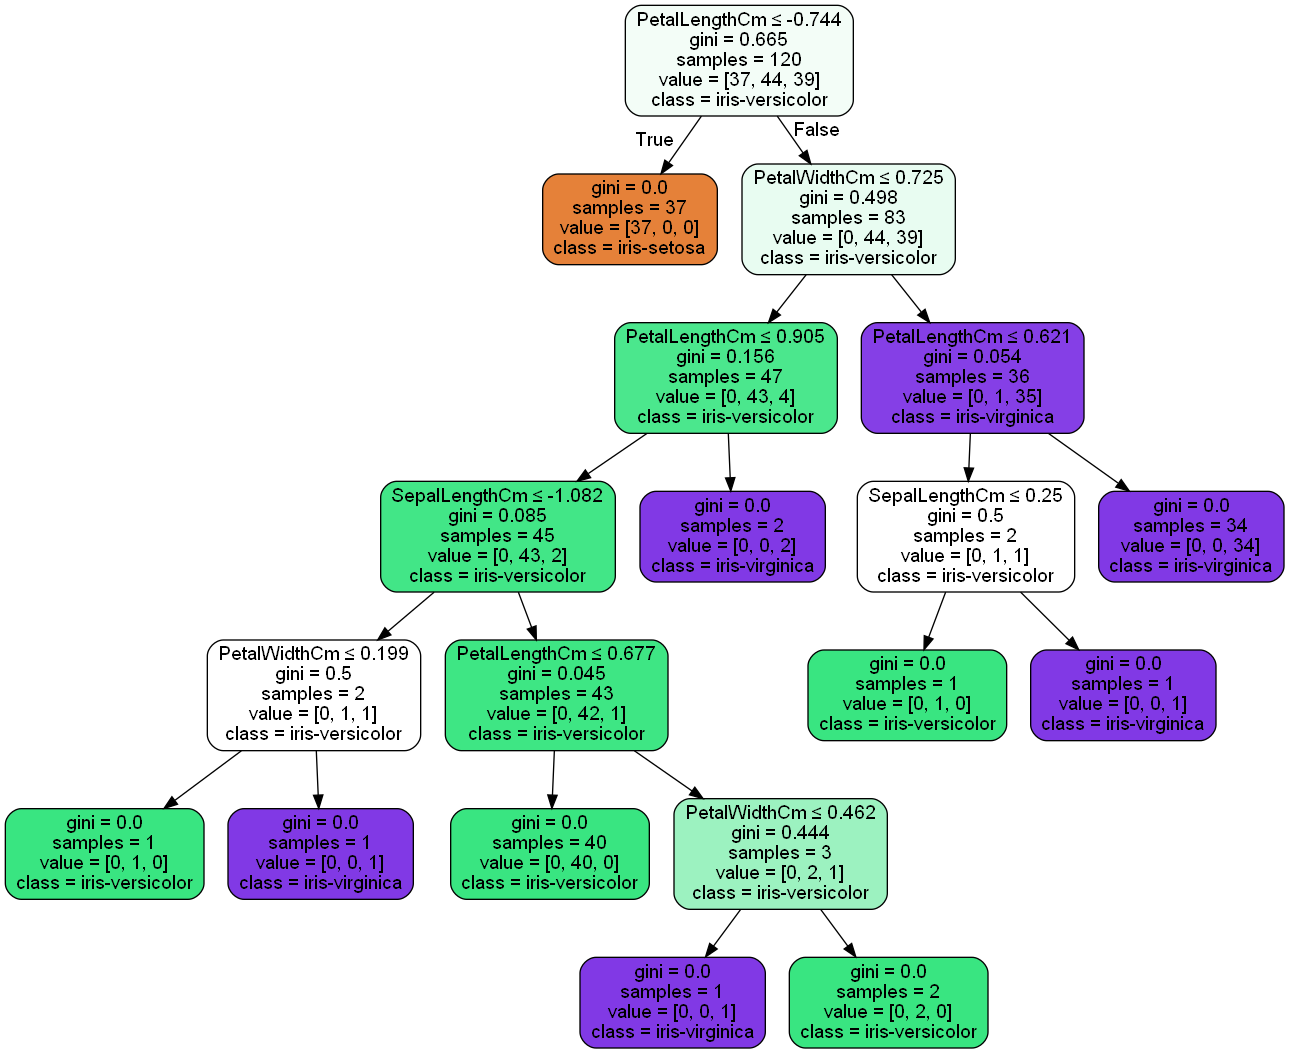

In [14]:
# Generating the graphviz
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model_DecisionTree, out_file = dot_data, filled = True,
                rounded = True, special_characters = True, feature_names = features, 
                class_names=['iris-setosa','iris-versicolor','iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

##### Evaluating the model

In [15]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

Accuracy of the model:  0.9666666666666667


##### Predicting on a new data

In [16]:
sepal_l = float(input("Enter the SepalLength: "))
sepal_w = float(input("Enter the SepalWidth: "))
petal_l = float(input("Enter the PetalLength: "))
petal_w = float(input("Enter the PetalWidth: "))
new_pred = model_DecisionTree.predict([[sepal_l, sepal_w, petal_l, petal_w]])
print("The given flower is of type = {}".format(new_pred[0]))

Enter the SepalLength: 2
Enter the SepalWidth: 3
Enter the PetalLength: 3
Enter the PetalWidth: 3
The given flower is of type = Iris-virginica


Hence with the above example shown in the test data we can now easily predict the species with the specified perimeters.